# logistic Regression and KnegborsClassifier

In [1]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data      # features
y = iris.target    # labels
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [2]:
import numpy as np
import pandas as pd
df = pd.DataFrame(X , columns = iris.feature_names)
df["species"] = y
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# EDA

In [3]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
species,0.782561,-0.426658,0.949035,0.956547,1.000000


In [6]:
df["species"].value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

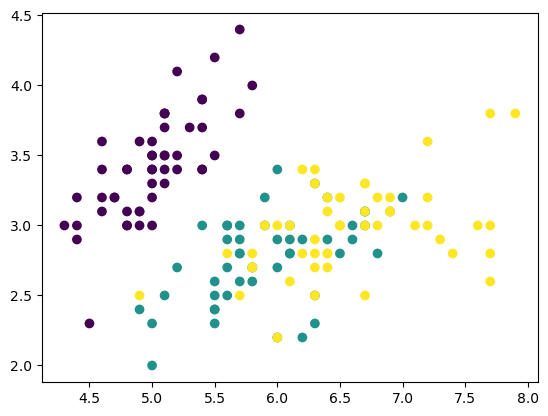

In [7]:
plt.scatter(df["sepal length (cm)"] , df["sepal width (cm)"] , c = df["species"])
plt.show()

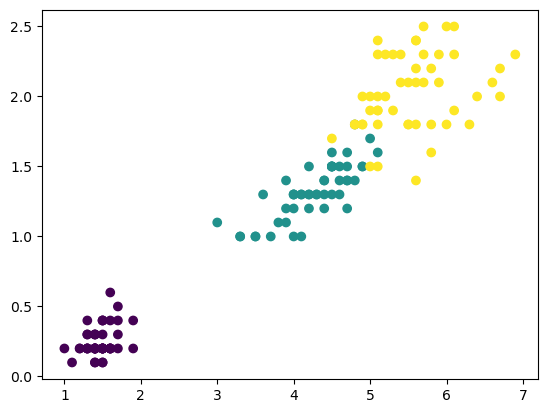

In [8]:
plt.scatter(df["petal length (cm)"],df["petal width (cm)"],c = df["species"])
plt.show()

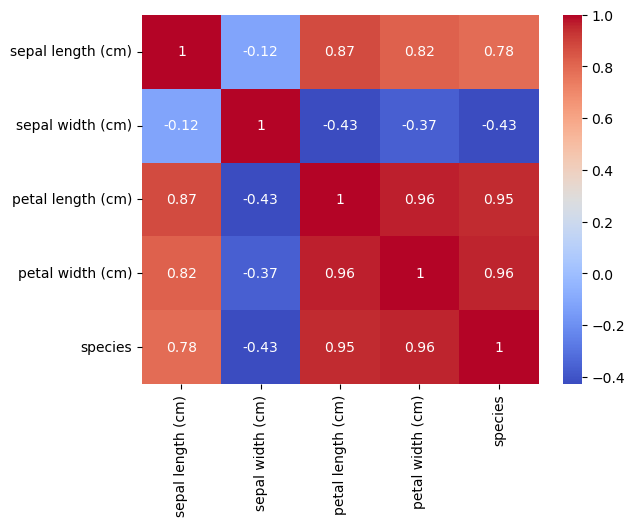

In [9]:
corr = df.corr()
sns.heatmap(corr , cmap = "coolwarm" , annot = True)
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
X = df.drop(columns = ["species"])
y = df["species"]
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2)


In [11]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression — Syntax & Basic Arguments

```python
LogisticRegression(
    max_iter=200,   # maximum number of iterations for optimization
    C=1.0,          # inverse of regularization strength (controls overfitting)
    solver="lbfgs"  # optimization algorithm (default & recommended)
)


In [12]:
lr = LogisticRegression(
    max_iter = 200,
    C = 1.0 , 
    solver = "lbfgs"
)
lr.fit(X_train , y_train)

LogisticRegression(max_iter=200)

In [13]:
y_pred = lr.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test ,  y_pred)
accuracy

0.9333333333333333

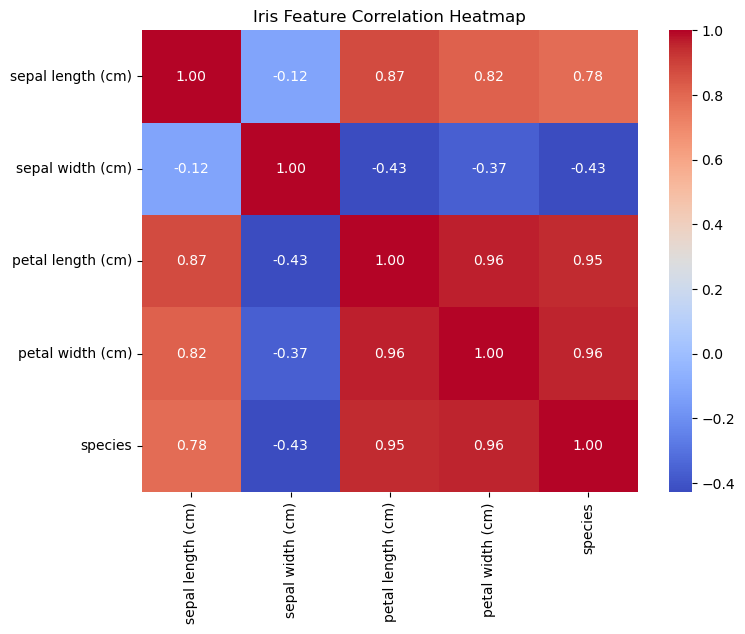

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))

sns.heatmap(
    df.corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)

plt.title("Iris Feature Correlation Heatmap")
plt.show()


# KNN
we already used train test split but here we should always scale data first , though for iris datset it was not required .

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[-0.28329276, -0.60782388,  0.6296622 ,  1.06468247],
       [-0.88818833,  1.47614372, -1.28608856, -1.07583098],
       [ 1.16845661, -0.60782388,  0.57331659,  0.26198993],
       [ 1.0474775 , -0.14471997,  0.68600781,  0.6633362 ],
       [ 0.80551927, -0.60782388,  0.46062537,  0.39577202],
       [-0.04133453, -0.83937584,  0.06620609, -0.00557425],
       [ 0.56356104, -0.37627193,  1.02408147,  0.79711829],
       [-0.40427187, -1.76558366,  0.1225517 ,  0.12820784],
       [ 0.68454015,  0.31838394,  0.85504464,  1.46602875],
       [ 0.32160281, -0.14471997,  0.6296622 ,  0.79711829],
       [-0.28329276, -0.37627193, -0.10283074,  0.12820784],
       [-0.16231364, -0.60782388,  0.40427976,  0.12820784],
       [-0.40427187, -1.0709278 ,  0.34793415, -0.00557425],
       [-1.00916744,  1.01303981, -1.22974295, -0.8082668 ],
       [-0.88818833, -1.30247975, -0.4409044 , -0.13935634],
       [ 0.80551927, -0.14471997,  0.96773586,  0.79711829],
       [-0.76720922, -0.

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train , y_train)

KNeighborsClassifier()

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn_scaled = KNeighborsClassifier(n_neighbors = 5)
knn_scaled.fit(X_train_scaled , y_train)

KNeighborsClassifier()

In [19]:
y_pred = knn.predict(X_test)
y_pred = knn_scaled.predict(X_test_scaled)

In [20]:
from sklearn.metrics import accuracy_score , classification_report

print("accuracy_score : " , accuracy_score(y_test , y_pred) )
print("classification_report : " , classification_report(y_test, y_pred))



accuracy_score :  0.9
classification_report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.77      0.87        13
           2       0.70      1.00      0.82         7

    accuracy                           0.90        30
   macro avg       0.90      0.92      0.90        30
weighted avg       0.93      0.90      0.90        30

